# Task 3: Exploring Sentiment Analysis through Text Mining: A case study of reviews of New York’s Hotels’ Restaurants

In [1]:
# Install the wordcloud package and import the required libraries

!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
import nltk
nltk.download(['stopwords',
              'punkt',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read the dataset as pandas dataframe
Restaur_Reviews = pd.read_csv('Restaurant_Review_dataset.csv')

# Check the first few rows of the dataset
Restaur_Reviews.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,rating_value,avg_rating,reviews_count,locality,country,helpful,rating,review_text
0,Veramente delicioso at their new venue 106 Eas...,25-Nov-20,Trail732875,NaN,"07/18/2021, 22:26:30",https://www.tripadvisor.in/Restaurant_Review-g...,Piccola Cucina,/Restaurant_Review-g60763-d1731141-Reviews-Pic...,4.5,4.5,987,New York City,United States,2.0,5,Two friends and I had lunch at the new uptown ...
1,Amazing dinner!,03-Nov-20,flgrayhair,NaN,"07/18/2021, 22:26:30",https://www.tripadvisor.in/Restaurant_Review-g...,Piccola Cucina,/Restaurant_Review-g60763-d1731141-Reviews-Pic...,4.5,4.5,987,New York City,United States,3.0,5,The staff were so friendly! The food was amazi...
2,Magnificent,22-Aug-20,proctormeghan209,NaN,"07/18/2021, 22:26:30",https://www.tripadvisor.in/Restaurant_Review-g...,Piccola Cucina,/Restaurant_Review-g60763-d1731141-Reviews-Pic...,4.5,4.5,987,New York City,United States,4.0,5,Was working in the area and had a spot of lunc...
3,Pasta,04-Jun-20,182dominicb,NaN,"07/18/2021, 22:26:30",https://www.tripadvisor.in/Restaurant_Review-g...,Piccola Cucina,/Restaurant_Review-g60763-d1731141-Reviews-Pic...,4.5,4.5,987,New York City,United States,4.0,5,I had a friend who is the biggest pasta lover ...
4,Small spot with big flavor,21-Apr-20,ofdevils,NaN,"07/18/2021, 22:26:30",https://www.tripadvisor.in/Restaurant_Review-g...,Piccola Cucina,/Restaurant_Review-g60763-d1731141-Reviews-Pic...,4.5,4.5,987,New York City,United States,3.0,5,Cozy little restaurant in Soho. Servers are au...


In [3]:
# Drop some columns

Restaur_Reviews.drop(['images', 'crawled_at', 'url', 'hotel_url', 'rating_value', 'avg_rating', 'reviews_count', 
                      'helpful'], axis = 1, inplace = True)

# Check to confirm that the columns have been dropped

Restaur_Reviews.head()

,review_title,reviewed_at,reviewed_by,hotel_name,locality,country,rating,review_text
0,Veramente delicioso at their new venue 106 Eas...,25-Nov-20,Trail732875,Piccola Cucina,New York City,United States,5,Two friends and I had lunch at the new uptown ...
1,Amazing dinner!,03-Nov-20,flgrayhair,Piccola Cucina,New York City,United States,5,The staff were so friendly! The food was amazi...
2,Magnificent,22-Aug-20,proctormeghan209,Piccola Cucina,New York City,United States,5,Was working in the area and had a spot of lunc...
3,Pasta,04-Jun-20,182dominicb,Piccola Cucina,New York City,United States,5,I had a friend who is the biggest pasta lover ...
4,Small spot with big flavor,21-Apr-20,ofdevils,Piccola Cucina,New York City,United States,5,Cozy little restaurant in Soho. Servers are au...


In [4]:
# Check the number of rows and columns of the dataset

Restaur_Reviews.shape

(3716, 8)

In [5]:
# Convert the data type of all columns to object

Restaur_Reviews = Restaur_Reviews.astype(object)

In [6]:
# Check the brief description of the dataset

Restaur_Reviews.describe()

,review_title,reviewed_at,reviewed_by,hotel_name,locality,country,rating,review_text
count,3716,3716,3716,3716,3716,3716,3716,3716
unique,3361,1322,3582,22,3,1,5,3716
top,Amazing,05-Jan-20,KevinS625,SottoCasa Pizzeria,New York City,United States,5,Two friends and I had lunch at the new uptown ...
freq,21,51,7,380,3379,3716,2943,1


In [7]:
# Check for missing values

Restaur_Reviews.isnull().sum()

review_title    0
reviewed_at     0
reviewed_by     0
hotel_name      0
locality        0
country         0
rating          0
review_text     0
dtype: int64

In [8]:
# Calculate the sentiment polarity scores for each review in the review_text column

# Import the SentimentIntensityAnalyzer class
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

# Calculate the compound sentiment score for each review and it to a new 'compound' column in the dataframe
Restaur_Reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in Restaur_Reviews['review_text']]

# Calculate the compound sentiment score for each review and it to a new 'compound' column in the dataframe
Restaur_Reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in Restaur_Reviews['review_text']]

# Calculate the compound sentiment score for each review and it to a new 'compound' column in the dataframe
Restaur_Reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in Restaur_Reviews['review_text']]

# Calculate the compound sentiment score for each review and it to a new 'compound' column in the dataframe
Restaur_Reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in Restaur_Reviews['review_text']]

In [9]:
# Confirm that the polarity scores has been added to the dataset

Restaur_Reviews.head()

,review_title,reviewed_at,reviewed_by,hotel_name,locality,country,rating,review_text,compound,neg,neu,pos
0,Veramente delicioso at their new venue 106 Eas...,25-Nov-20,Trail732875,Piccola Cucina,New York City,United States,5,Two friends and I had lunch at the new uptown ...,0.8687,0.000,0.799,0.201
1,Amazing dinner!,03-Nov-20,flgrayhair,Piccola Cucina,New York City,United States,5,The staff were so friendly! The food was amazi...,0.9115,0.000,0.633,0.367
2,Magnificent,22-Aug-20,proctormeghan209,Piccola Cucina,New York City,United States,5,Was working in the area and had a spot of lunc...,0.0752,0.123,0.786,0.091
3,Pasta,04-Jun-20,182dominicb,Piccola Cucina,New York City,United States,5,I had a friend who is the biggest pasta lover ...,0.9042,0.000,0.603,0.397
4,Small spot with big flavor,21-Apr-20,ofdevils,Piccola Cucina,New York City,United States,5,Cozy little restaurant in Soho. Servers are au...,0.8316,0.000,0.740,0.260


In [10]:
# Check the statistical description of the polarity scores

Restaur_Reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3716.000000,3716.000000,3716.000000,3716.000000
mean,0.761541,0.018727,0.705886,0.275387
std,0.321138,0.038394,0.133979,0.140710
min,-0.977400,0.000000,0.267000,0.000000
25%,0.741725,0.000000,0.616000,0.171000
50%,0.890400,0.000000,0.711000,0.271000
75%,0.942100,0.030000,0.802000,0.369000
max,0.993100,0.383000,1.000000,0.733000


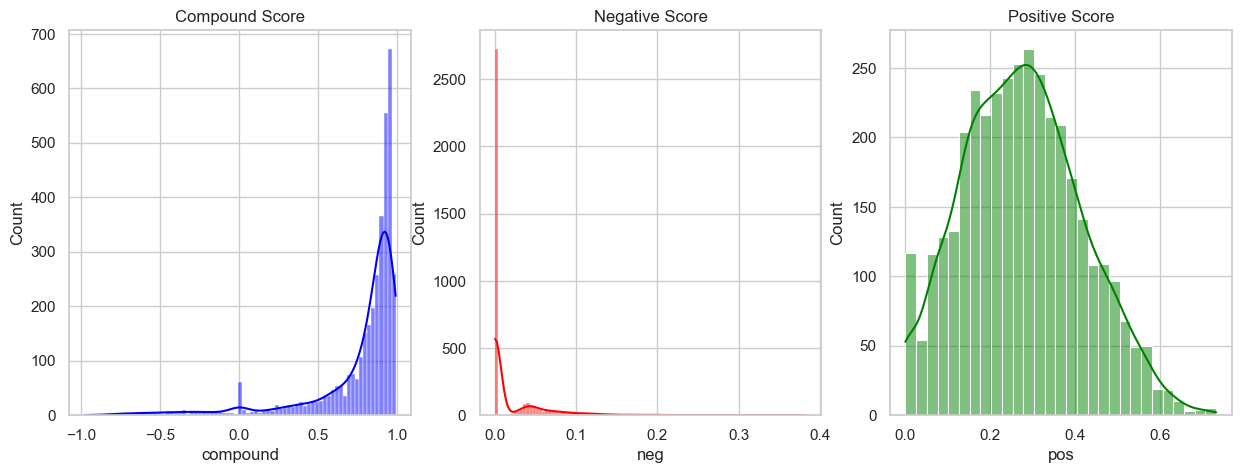

In [11]:
# Visualize the histogram plots of the polarity scores

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms side by side
sns.histplot(Restaur_Reviews['compound'], kde=True, color='blue', ax=axes[0]).set(title='Compound Score')
sns.histplot(Restaur_Reviews['neg'], kde=True, color='red', ax=axes[1]).set(title='Negative Score')
sns.histplot(Restaur_Reviews['pos'], kde=True, color='green', ax=axes[2]).set(title='Positive Score')

plt.show()

In [12]:
# Calculate the total number of negative reviews for each restaurant

(Restaur_Reviews['compound']<=0).groupby(Restaur_Reviews['hotel_name']).sum()

hotel_name
B Side Pizzeria                     2
Benjamin Steakhouse Prime          21
Bleecker Street Pizza               9
Boucherie Union Square              8
Casa Barilla                       28
City Vineyard                       2
Daniel                             15
East Harlem Bottling Company        1
Fiore Deli of Hoboken              13
Jungsik                            17
K Rico Steakhouse                   7
Loi Estiatorio                      9
Mei Jin Ramen                       1
Norma                               2
Obao                               10
Olio e Piu                          7
Petite Boucherie                    1
Piccola Cucina                     12
Piccola Cucina Osteria              9
SottoCasa Pizzeria                 19
Spice Symphony                     20
Tito Murphy's Cantina & Kitchen     3
Name: compound, dtype: int64

In [13]:
# Check the number of negative reviews as a proportion of the total reviews for each restaurant

percent_negative = pd.DataFrame((Restaur_Reviews['compound']<=0).groupby(Restaur_Reviews['hotel_name']).sum()
                               / Restaur_Reviews['hotel_name'].groupby(Restaur_Reviews['hotel_name']).count()*100,
                               columns = ['% negative reviews']).sort_values(by = '% negative reviews')

percent_negative

,% negative reviews
hotel_name,
Mei Jin Ramen,0.625000
City Vineyard,1.333333
Petite Boucherie,3.333333
K Rico Steakhouse,3.500000
East Harlem Bottling Company,3.571429
Olio e Piu,3.684211
Boucherie Union Square,4.000000
Norma,4.000000
Piccola Cucina Osteria,4.285714


<Axes: xlabel='% negative reviews', ylabel='hotel_name'>

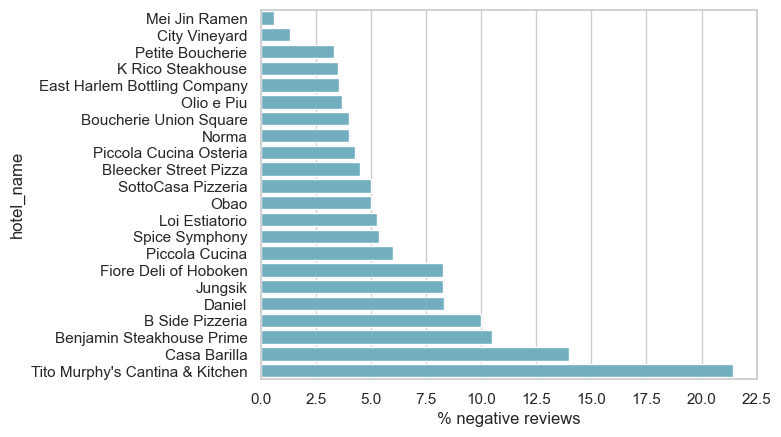

In [14]:
# plot horizontal barplot

sns.barplot(data=percent_negative, x = '% negative reviews', y = percent_negative.index, color = 'c')

In [15]:
# Create a function for all the pre-processing steps
stop_words = nltk.corpus.stopwords.words('english') # Define a list of english stop words

def preprocess_text(text):
    # Tokenize the input text
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) 
    # Remove stop words and convert to lower case
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] 
    # Apply stemming to the cleaned tokens
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] 
    return stemmed_text

# Process the review_text data for wordcloud visualization, by using the predefined function

Restaur_Reviews['processed_review'] = Restaur_Reviews['review_text'].apply(preprocess_text)

Restaur_Reviews_positive_subset = Restaur_Reviews.loc[(Restaur_Reviews['hotel_name'] == 'Casa Barilla')
& (Restaur_Reviews['compound']>0),:] # Create a subset contain positive reviews for Casa Barilla

Restaur_Reviews_negative_subset = Restaur_Reviews.loc[(Restaur_Reviews['hotel_name'] =='Casa Barilla')
& (Restaur_Reviews['compound']<=0),:] # Create a subset contain negative reviews for Casa Barilla

Restaur_Reviews_positive_subset.head() # Display the first few rows of the positive reviews subset

,review_title,reviewed_at,reviewed_by,hotel_name,locality,country,rating,review_text,compound,neg,neu,pos,processed_review
204,Don't get carbona takeout!!!,09-Jun-21,Scoutings,Casa Barilla,New York City,United States,3,I ordered the pasta carbonara on the waiter's ...,0.3612,0.0,0.937,0.063,"[order, pasta, carbonara, waiter', recommend, ..."
205,Best waitstaff I have ever had!,08-Mar-20,759greggn,Casa Barilla,New York City,United States,5,I was in NYC for a conference with 28 teenager...,0.7964,0.0,0.824,0.176,"[nyc, confer, 28, teenag, need, meal, would, p..."
206,An Excellent Pasta Value,08-Feb-20,dkatbrooks,Casa Barilla,New York City,United States,4,We were headed to a show at Radio City and had...,0.9603,0.0,0.637,0.363,"[head, show, radio, citi, tasti, meal, pasta, ..."
208,"Delicious food, reasonable price",18-Jan-20,SirpaStar,Casa Barilla,New York City,United States,4,"Delicious food, super reasonable price, good l...",0.9335,0.0,0.399,0.601,"[delici, food, super, reason, price, good, loc..."
209,Great discover in NYC,16-Jan-20,dayanaemme,Casa Barilla,New York City,United States,5,I’m Italian and I’ve been there 2 times when m...,0.8519,0.0,0.807,0.193,"[italian, 2, time, parent, came, visit, new, y..."


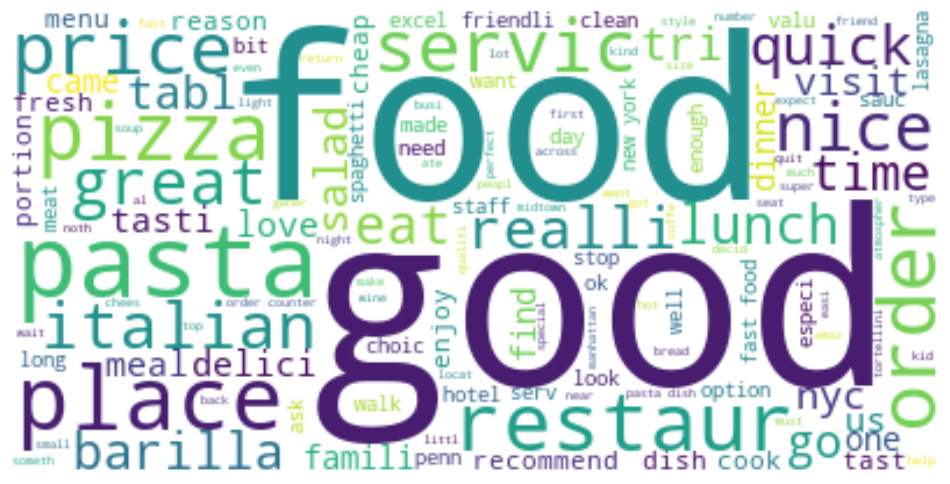

In [16]:
# Wordcloud for words with positive reviews by product

pos_tokens = [word for review in Restaur_Reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(pos_tokens))

# Display the generated image

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

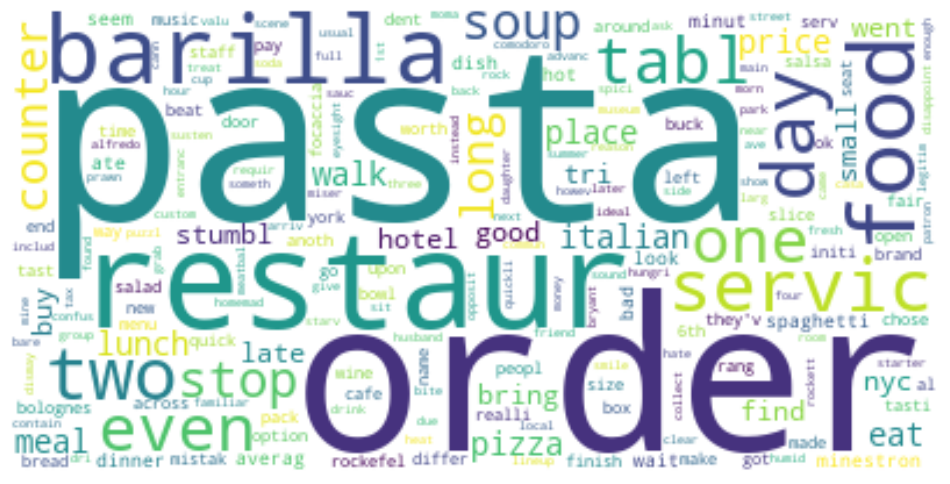

In [17]:
# Wordcloud for words with negative reviews by hotel

neg_tokens = [word for review in Restaur_Reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(neg_tokens))

# Display the generated image

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Use FreqDist to calculate the frequency of each word and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   good    food   pasta   place   order restaur   pizza   price  servic    nice 
    101      95      92      60      56      49      47      41      41      34 


In [19]:
# Use FreqDist to calculate the frequency of each word and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

  pasta   order restaur barilla    food     two  servic     day    tabl    even 
     17      13      12      10       9       6       6       6       5       5 


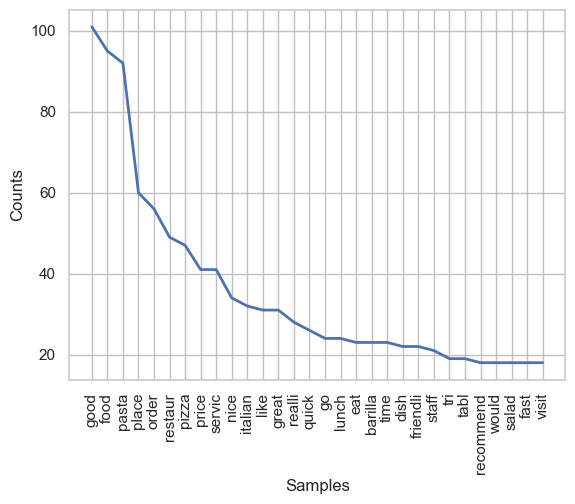

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# Plot the frequency distribution of the positive reviews wordcloud

pos_freqdist.plot(30)

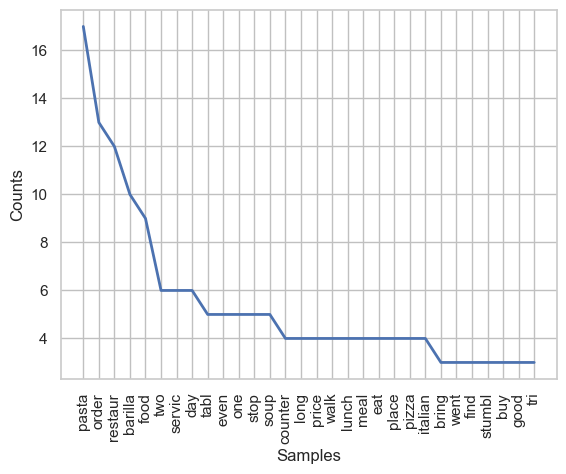

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
# Plot the frequency distribution of the negative reviews wordcloud

neg_freqdist.plot(30)